## Importing Libraries and creating folders

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2
import random
from PIL import Image
import keras

from tensorflow.keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,ZeroPadding2D,Dense, Add
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unrar x "/content/gdrive/MyDrive/GALL_BLADDER_DATASET.rar"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/gdrive/MyDrive/GALL_BLADDER_DATASET.rar

Creating    GALL_BLADDER_DATASET                                      OK
Creating    GALL_BLADDER_DATASET/Case 1                               OK
Creating    GALL_BLADDER_DATASET/Case 1/Case 1 Labeled                OK
Extracting  GALL_BLADDER_DATASET/Case 1/Case 1 Labeled/1.tif               0%  OK 
Extracting  GALL_BLADDER_DATASET/Case 1/Case 1 Labeled/10.tif              0%  OK 
Extracting  GALL_BLADDER_DATASET/Case 1/Case 1 Labeled/11.tif              0%  OK 
Extracting  GALL_BLADDER_DATASET/Case 1/Case 1 Labeled/12.tif              0%  OK 
Extracting  GALL_BLADDER_DATASET/Case 1/Case 1 Labeled/13.tif              0%  OK 
Extracting  GALL_BLADDER_DATASET/Case 1/Case 1 Labeled/14.tif              0%  OK 
Extracting  GALL_BLADDER_DATASET/Case 1/Case 1 Labeled/15.tif              0% 

In [ ]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir("/content/GALL_BLADDER_DATASET")

There are 16 directories and 0 images in '/content/GALL_BLADDER_DATASET'.
There are 2 directories and 0 images in '/content/GALL_BLADDER_DATASET/Case 11'.
There are 0 directories and 109 images in '/content/GALL_BLADDER_DATASET/Case 11/Case 11 Labeled'.
There are 0 directories and 109 images in '/content/GALL_BLADDER_DATASET/Case 11/Case 11 Raw'.
There are 2 directories and 0 images in '/content/GALL_BLADDER_DATASET/Case 4'.
There are 0 directories and 82 images in '/content/GALL_BLADDER_DATASET/Case 4/Case 4 Raw'.
There are 0 directories and 82 images in '/content/GALL_BLADDER_DATASET/Case 4/Case 4 Labeled'.
There are 2 directories and 0 images in '/content/GALL_BLADDER_DATASET/Case 2'.
There are 0 directories and 70 images in '/content/GALL_BLADDER_DATASET/Case 2/Case 2 Labeled'.
There are 0 directories and 70 images in '/content/GALL_BLADDER_DATASET/Case 2/Case 2 Raw'.
There are 2 directories and 0 images in '/content/GALL_BLADDER_DATASET/Case 13'.
There are 0 directories and 77 ima

In [ ]:
!rm -rf '/content/GALL_BLADDER_DATA/Case 5/.ipynb_checkpoints'

In [ ]:
!rm -rf '/content/GALL_BLADDER_DATA/Case 8/.ipynb_checkpoints'

In [ ]:
raw = []
lbl = []
temp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
for i in range(len(temp)):
  raw.append("/content/GALL_BLADDER_DATASET/Case "+str(temp[i])+"/Case "+str(temp[i])+" Raw")
  lbl.append("/content/GALL_BLADDER_DATASET/Case "+str(temp[i])+"/Case "+str(temp[i])+" Labeled")

In [ ]:
raw, lbl

(['/content/GALL_BLADDER_DATASET/Case 1/Case 1 Raw',
  '/content/GALL_BLADDER_DATASET/Case 2/Case 2 Raw',
  '/content/GALL_BLADDER_DATASET/Case 3/Case 3 Raw',
  '/content/GALL_BLADDER_DATASET/Case 4/Case 4 Raw',
  '/content/GALL_BLADDER_DATASET/Case 5/Case 5 Raw',
  '/content/GALL_BLADDER_DATASET/Case 6/Case 6 Raw',
  '/content/GALL_BLADDER_DATASET/Case 7/Case 7 Raw',
  '/content/GALL_BLADDER_DATASET/Case 8/Case 8 Raw',
  '/content/GALL_BLADDER_DATASET/Case 9/Case 9 Raw',
  '/content/GALL_BLADDER_DATASET/Case 10/Case 10 Raw',
  '/content/GALL_BLADDER_DATASET/Case 11/Case 11 Raw',
  '/content/GALL_BLADDER_DATASET/Case 12/Case 12 Raw',
  '/content/GALL_BLADDER_DATASET/Case 13/Case 13 Raw',
  '/content/GALL_BLADDER_DATASET/Case 14/Case 14 Raw',
  '/content/GALL_BLADDER_DATASET/Case 15/Case 15 Raw',
  '/content/GALL_BLADDER_DATASET/Case 16/Case 16 Raw'],
 ['/content/GALL_BLADDER_DATASET/Case 1/Case 1 Labeled',
  '/content/GALL_BLADDER_DATASET/Case 2/Case 2 Labeled',
  '/content/GALL_BLADDE

In [ ]:
sum = 0
for i in range(len(raw)):
  walk_through_dir(raw[i])
  sum += len(os.listdir(raw[i]))

sum

There are 0 directories and 73 images in '/content/GALL_BLADDER_DATASET/Case 1/Case 1 Raw'.
There are 0 directories and 70 images in '/content/GALL_BLADDER_DATASET/Case 2/Case 2 Raw'.
There are 0 directories and 128 images in '/content/GALL_BLADDER_DATASET/Case 3/Case 3 Raw'.
There are 0 directories and 82 images in '/content/GALL_BLADDER_DATASET/Case 4/Case 4 Raw'.
There are 0 directories and 70 images in '/content/GALL_BLADDER_DATASET/Case 5/Case 5 Raw'.
There are 0 directories and 58 images in '/content/GALL_BLADDER_DATASET/Case 6/Case 6 Raw'.
There are 0 directories and 98 images in '/content/GALL_BLADDER_DATASET/Case 7/Case 7 Raw'.
There are 0 directories and 53 images in '/content/GALL_BLADDER_DATASET/Case 8/Case 8 Raw'.
There are 0 directories and 122 images in '/content/GALL_BLADDER_DATASET/Case 9/Case 9 Raw'.
There are 0 directories and 40 images in '/content/GALL_BLADDER_DATASET/Case 10/Case 10 Raw'.
There are 0 directories and 109 images in '/content/GALL_BLADDER_DATASET/Cas

1241

In [ ]:
sum = 0
for i in range(len(lbl)):
  walk_through_dir(lbl[i])
  sum += len(os.listdir(lbl[i]))

sum

There are 0 directories and 73 images in '/content/GALL_BLADDER_DATASET/Case 1/Case 1 Labeled'.
There are 0 directories and 70 images in '/content/GALL_BLADDER_DATASET/Case 2/Case 2 Labeled'.
There are 0 directories and 128 images in '/content/GALL_BLADDER_DATASET/Case 3/Case 3 Labeled'.
There are 0 directories and 82 images in '/content/GALL_BLADDER_DATASET/Case 4/Case 4 Labeled'.
There are 0 directories and 70 images in '/content/GALL_BLADDER_DATASET/Case 5/Case 5 Labeled'.
There are 0 directories and 58 images in '/content/GALL_BLADDER_DATASET/Case 6/Case 6 Labeled'.
There are 0 directories and 98 images in '/content/GALL_BLADDER_DATASET/Case 7/Case 7 Labeled'.
There are 0 directories and 53 images in '/content/GALL_BLADDER_DATASET/Case 8/Case 8 Labeled'.
There are 0 directories and 122 images in '/content/GALL_BLADDER_DATASET/Case 9/Case 9 Labeled'.
There are 0 directories and 40 images in '/content/GALL_BLADDER_DATASET/Case 10/Case 10 Labeled'.
There are 0 directories and 109 imag

1241

In [ ]:
!rm -rf '/content/GALL_BLADDER_DATA/Case 14/Case 14 Labeled/.ipynb_checkpoints'

## Creating masks from contours

In [ ]:
# make a directory for masks and save masks in it
!mkdir Masks
!mkdir Masks/Case_1
!mkdir Masks/Case_2
!mkdir Masks/Case_3
!mkdir Masks/Case_4
!mkdir Masks/Case_5
!mkdir Masks/Case_6
!mkdir Masks/Case_7
!mkdir Masks/Case_8
!mkdir Masks/Case_9
!mkdir Masks/Case_10
!mkdir Masks/Case_11
!mkdir Masks/Case_12
!mkdir Masks/Case_13
!mkdir Masks/Case_14
!mkdir Masks/Case_15
!mkdir Masks/Case_16

In [ ]:
mask = []
for i in range(16):
  mask.append("/content/Masks/Case_"+str(i+1))

mask

['/content/Masks/Case_1',
 '/content/Masks/Case_2',
 '/content/Masks/Case_3',
 '/content/Masks/Case_4',
 '/content/Masks/Case_5',
 '/content/Masks/Case_6',
 '/content/Masks/Case_7',
 '/content/Masks/Case_8',
 '/content/Masks/Case_9',
 '/content/Masks/Case_10',
 '/content/Masks/Case_11',
 '/content/Masks/Case_12',
 '/content/Masks/Case_13',
 '/content/Masks/Case_14',
 '/content/Masks/Case_15',
 '/content/Masks/Case_16']

In [ ]:
#function to display random images from the directories
def display_img(img_dir, num):
  img_list = os.listdir(img_dir)
  im_path = os.path.join(img_dir, img_list[num])
  im = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)
  im = cv2.resize(im, (1024, 1024), interpolation=cv2.INTER_AREA)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()
  print("Shape of the image: ", im.shape)

In [ ]:
k = random.randint(0, len(raw)-1)
k

15

In [ ]:
raw_dir = raw[k]
lbl_dir = lbl[k]
print(len(os.listdir(raw_dir)))
print(len(os.listdir(lbl_dir)))

93
93


In [ ]:
n = random.randint(0, len(os.listdir(raw_dir))-1)
n

39

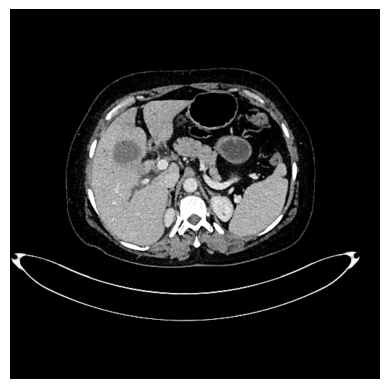

Shape of the image:  (1024, 1024, 4)


In [ ]:
#displaying the original image
display_img(img_dir=raw_dir, num=n)

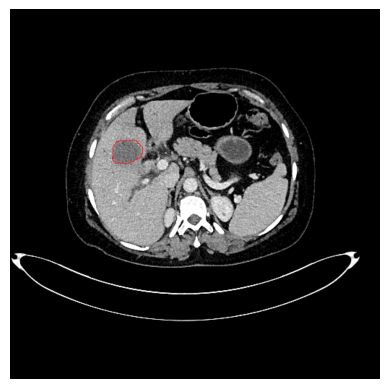

Shape of the image:  (1024, 1024, 4)


In [ ]:
#displaying the mask
display_img(img_dir=lbl_dir, num=n)

In [ ]:
pm_path = os.path.join(lbl_dir, os.listdir(lbl_dir)[n])
pm_path

'/content/GALL_BLADDER_DATASET/Case 16/Case 16 Labeled/10.tif'

In [ ]:
img = cv2.imread(pm_path, 3)
img, img.shape

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 (512, 512, 3))

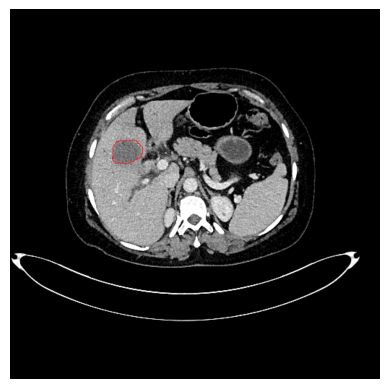

In [ ]:
img = cv2.resize(img, (1024, 1024), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

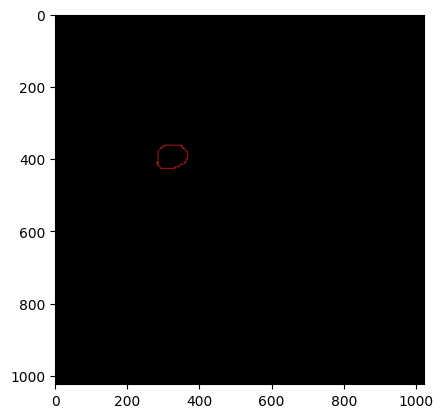

In [ ]:
result = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])

# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])

lower_mask = cv2.inRange(img, lower1, upper1)
upper_mask = cv2.inRange(img, lower2, upper2)

full_mask = lower_mask + upper_mask;

result = cv2.bitwise_and(result, result, mask=full_mask)

result = cv2.resize(result, (1024, 1024), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [ ]:
result.shape

(1024, 1024, 3)

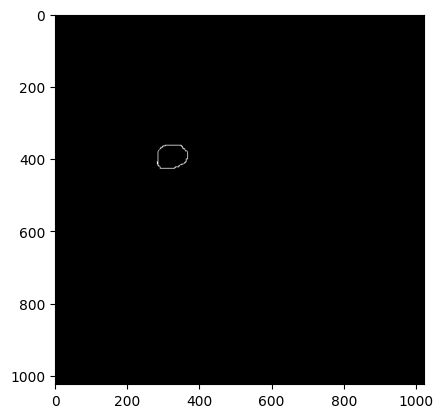

In [ ]:
mask = cv2.resize(full_mask, (1024, 1024), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(full_mask, cv2.COLOR_BGR2RGB))

In [ ]:
mask.shape

(1024, 1024)

In [ ]:
# #convert image to BGR
# mask = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

# #convert image to grayscale
# img_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

(1024, 1024, 3)


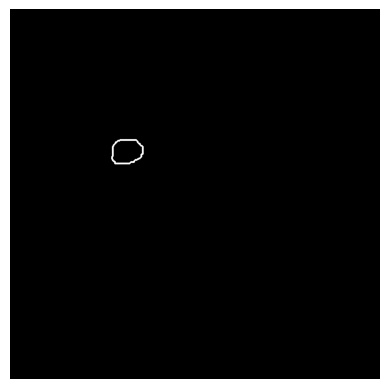

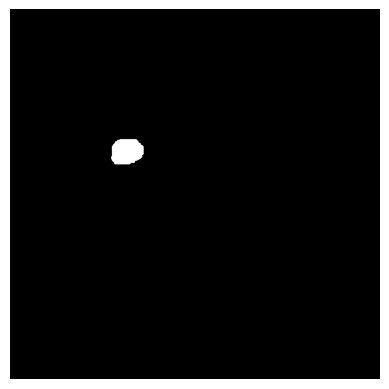

In [ ]:
#convert image to black and white
thresh, img_edges = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)

#create canvas
canvas = np.zeros(img.shape, np.uint8)
canvas.fill(0)

#create background mask
mask = np.zeros(img.shape, np.uint8)
mask.fill(0)

#get contours
contours_draw, hierarchy = cv2.findContours(np.array(img_edges, np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#get the most significant contours
contours_mask, hierarchy = cv2.findContours(np.array(img_edges, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#draw all the contours
print(canvas.shape)
cv2.drawContours(canvas, contours_draw, -1, (255, 255, 255), 2)

#contour traversal
# for contour in range(len(contours_draw)):
#   #draw the current contour
#   cv2.drawContours(canvas, contours_draw, contour, (0, 0, 0), 3)

#   #display the contours
#   plt.imshow(canvas, cmap='gray')
#   plt.axis('off')
#   plt.show()

#most significant contour traversal
for contour in range(len(contours_mask)):
  #draw the current contour
  cv2.drawContours(mask, contours_mask, contour, (255, 255, 255), 3)

  #display the contours
  plt.imshow(mask, cmap='gray')
  plt.axis('off')
  plt.show()

#creating a mask from the most significant contour
for contour in range(len(contours_mask)):
  #draw the mask
  cv2.fillConvexPoly(mask, contours_mask[contour], (255, 255, 255))

  #display the mask
  plt.imshow(mask, cmap='gray')
  plt.axis('off')
  plt.show()

# #display the image
# plt.imshow(canvas)
# plt.axis('off')
# plt.show()

In [ ]:
# img = cv2.imread(pm_path, cv2.IMREAD_UNCHANGED)

# #convert image to grayscale
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# #convert image to black and white
# thresh, img_edges = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# #create canvas
# canvas = np.zeros(img.shape, np.uint8)
# canvas.fill(0)

# #create background mask
# mask = np.zeros(img.shape, np.uint8)
# mask.fill(0)

# #get contours
# contours_draw, hierarchy = cv2.findContours(img_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# #get the most significant contours
# contours_mask, hierarchy = cv2.findContours(img_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# #draw all the contours
# cv2.drawContours(canvas, contours_draw, -1, (255, 255, 255), 2)

# #contour traversal
# # for contour in range(len(contours_draw)):
# #   #draw the current contour
# #   cv2.drawContours(canvas, contours_draw, contour, (0, 0, 0), 3)

# #   #display the contours
# #   plt.imshow(canvas, cmap='gray')
# #   plt.axis('off')
# #   plt.show()

# #most significant contour traversal
# for contour in range(len(contours_mask)):
#   #draw the current contour
#   cv2.drawContours(mask, contours_mask, contour, (255, 255, 255), 3)

#   #display the contours
#   plt.imshow(mask, cmap='gray')
#   plt.axis('off')
#   plt.show()

# #creating a mask from the most significant contour
# for contour in range(len(contours_mask)):
#   #draw the mask
#   cv2.fillConvexPoly(mask, contours_mask[contour], (255, 255, 255))

#   #display the mask
#   plt.imshow(mask, cmap='gray')
#   plt.axis('off')
#   plt.show()
#   cv2.imwrite(os.path.join("/content/trial", pm_list[num]), mask)

# # #display the image
# # plt.imshow(canvas)
# # plt.axis('off')
# # plt.show()

In [ ]:
m_dir_list = ['/content/Masks/Case_1',
              '/content/Masks/Case_2',
              '/content/Masks/Case_3',
              '/content/Masks/Case_4',
              '/content/Masks/Case_5',
              '/content/Masks/Case_6',
              '/content/Masks/Case_7',
              '/content/Masks/Case_8',
              '/content/Masks/Case_9',
              '/content/Masks/Case_10',
              '/content/Masks/Case_11',
              '/content/Masks/Case_12',
              '/content/Masks/Case_13',
              '/content/Masks/Case_14',
              '/content/Masks/Case_15',
              '/content/Masks/Case_16']

In [ ]:
for j in range(len(raw)):
  temp = raw[j]
  test_lbl = '/content/GALL_BLADDER_DATASET/Case '+str(j+1)+'/Case '+str(j+1)+' Labeled'
  temp_list = os.listdir(temp)
  for i in range(len(temp_list)):
    if (temp_list[i].split('.')[1] == 'tif'):
          print(os.path.join(test_lbl, temp_list[i]))
          img = cv2.imread(os.path.join(test_lbl, temp_list[i]), cv2.IMREAD_UNCHANGED)

          result = img.copy()

          img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

          # lower boundary RED color range values; Hue (0 - 10)
          lower1 = np.array([0, 100, 20])
          upper1 = np.array([10, 255, 255])

          # upper boundary RED color range values; Hue (160 - 180)
          lower2 = np.array([160,100,20])
          upper2 = np.array([179,255,255])

          lower_mask = cv2.inRange(img, lower1, upper1)
          upper_mask = cv2.inRange(img, lower2, upper2)

          full_mask = lower_mask + upper_mask

          #convert image to grayscale
          # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          #convert image to black and white
          thresh, img_edges = cv2.threshold(full_mask, 100, 255, cv2.THRESH_BINARY)

          #create canvas
          canvas = np.zeros(img.shape, np.uint8)
          canvas.fill(0)

          #create background mask
          mask = np.zeros(img.shape, np.uint8)
          mask.fill(0)

          #get contours
          contours_draw, hierarchy = cv2.findContours(img_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

          #get the most significant contours
          contours_mask, hierarchy = cv2.findContours(img_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

          #draw all the contours
          cv2.drawContours(canvas, contours_draw, -1, (255, 255, 255), 2)

          #most significant contour traversal
          for contour in range(len(contours_mask)):
            #draw the current contour
            cv2.drawContours(mask, contours_mask, contour, (255, 255, 255), 3)

          #creating a mask from the most significant contour
          for contour in range(len(contours_mask)):
            #draw the mask
            cv2.fillConvexPoly(mask, contours_mask[contour], (255, 255, 255))
            cv2.imwrite(os.path.join(m_dir_list[j], temp_list[i]), mask)

          # #display the image
          # plt.imshow(canvas)
          # plt.axis('off')
          # plt.show()

In [ ]:
temp_list = os.listdir(raw[10])
test_lbl = "/content/GALL_BLADDER_DATASET/Case 11/Case 11 Labeled"
for i in range(len(temp_list)):
    if (temp_list[i].split('.')[1] == 'tif'):
          print(os.path.join(test_lbl, temp_list[i]))
          img = cv2.imread(os.path.join(test_lbl, temp_list[i]), cv2.IMREAD_UNCHANGED)

          result = img.copy()

          img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

          # lower boundary RED color range values; Hue (0 - 10)
          lower1 = np.array([0, 100, 20])
          upper1 = np.array([10, 255, 255])

          # upper boundary RED color range values; Hue (160 - 180)
          lower2 = np.array([160,100,20])
          upper2 = np.array([179,255,255])

          lower_mask = cv2.inRange(img, lower1, upper1)
          upper_mask = cv2.inRange(img, lower2, upper2)

          full_mask = lower_mask + upper_mask

          #convert image to grayscale
          # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          #convert image to black and white
          thresh, img_edges = cv2.threshold(full_mask, 100, 255, cv2.THRESH_BINARY)

          #create canvas
          canvas = np.zeros(img.shape, np.uint8)
          canvas.fill(0)

          #create background mask
          mask = np.zeros(img.shape, np.uint8)
          mask.fill(0)

          #get contours
          contours_draw, hierarchy = cv2.findContours(img_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

          #get the most significant contours
          contours_mask, hierarchy = cv2.findContours(img_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

          #draw all the contours
          cv2.drawContours(canvas, contours_draw, -1, (255, 255, 255), 2)

          #most significant contour traversal
          for contour in range(len(contours_mask)):
            #draw the current contour
            cv2.drawContours(mask, contours_mask, contour, (255, 255, 255), 3)

          #creating a mask from the most significant contour
          for contour in range(len(contours_mask)):
            #draw the mask
            cv2.fillConvexPoly(mask, contours_mask[contour], (255, 255, 255))
            cv2.imwrite(os.path.join("/content/case11", temp_list[i]), mask)

          # #display the image
          # plt.imshow(canvas)
          # plt.axis('off')
          # plt.show()

In [ ]:
walk_through_dir('/content/Masks')

There are 16 directories and 0 images in '/content/Masks'.
There are 0 directories and 122 images in '/content/Masks/Case_9'.
There are 0 directories and 77 images in '/content/Masks/Case_13'.
There are 0 directories and 77 images in '/content/Masks/Case_14'.
There are 0 directories and 38 images in '/content/Masks/Case_12'.
There are 0 directories and 58 images in '/content/Masks/Case_6'.
There are 0 directories and 128 images in '/content/Masks/Case_3'.
There are 0 directories and 40 images in '/content/Masks/Case_10'.
There are 0 directories and 53 images in '/content/Masks/Case_8'.
There are 0 directories and 94 images in '/content/Masks/Case_16'.
There are 0 directories and 70 images in '/content/Masks/Case_2'.
There are 0 directories and 39 images in '/content/Masks/Case_11'.
There are 0 directories and 82 images in '/content/Masks/Case_4'.
There are 0 directories and 70 images in '/content/Masks/Case_5'.
There are 0 directories and 53 images in '/content/Masks/Case_15'.
There ar

In [ ]:
walk_through_dir('/content/case11')

There are 0 directories and 39 images in '/content/case11'.


In [ ]:
walk_through_dir('/content/GALL_BLADDER_DATASET')

In [ ]:
!zip -r "/content/Masks.zip" "/content/Masks"